In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
###
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.preprocessing import LabelEncoder


In [2]:
data = {
    "Age" : [25, 45, 35, 50, 23, 37, 32, 28, 40, 27],
    "Income" : ['High', 'High', 'High', 'Medium', 'Low', 'Low', 'Low', 'Medium', 'Low', 'Medium'],
    "Student" : ['No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No'],
    "Buys_Computer" : ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes']
}

In [3]:
df = pd.DataFrame(data)
df.head()

,Age,Income,Student,Buys_Computer
0,25,High,No,No
1,45,High,No,No
2,35,High,No,Yes
3,50,Medium,No,Yes
4,23,Low,Yes,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            10 non-null     int64 
 1   Income         10 non-null     object
 2   Student        10 non-null     object
 3   Buys_Computer  10 non-null     object
dtypes: int64(1), object(3)
memory usage: 452.0+ bytes


In [5]:
df.isna().sum()

Age              0
Income           0
Student          0
Buys_Computer    0
dtype: int64

In [6]:
df.shape

(10, 4)

In [7]:
label_Encoder = LabelEncoder()
###
df["Income_encoded"] = label_Encoder.fit_transform(df["Income"])
df["Student_encoded"] = label_Encoder.fit_transform(df["Student"])
df["Buys_Computer_encoded"] = label_Encoder.fit_transform(df["Buys_Computer"])
df.head()

,Age,Income,Student,Buys_Computer,Income_encoded,Student_encoded,Buys_Computer_encoded
0,25,High,No,No,0,0,0
1,45,High,No,No,0,0,0
2,35,High,No,Yes,0,0,1
3,50,Medium,No,Yes,2,0,1
4,23,Low,Yes,Yes,1,1,1


In [8]:
df.drop(columns = ["Student","Income","Buys_Computer"] , inplace = True)
df.head()

,Age,Income_encoded,Student_encoded,Buys_Computer_encoded
0,25,0,0,0
1,45,0,0,0
2,35,0,0,1
3,50,2,0,1
4,23,1,1,1


In [9]:
X = df.drop(["Buys_Computer_encoded"],axis=1)
y = df["Buys_Computer_encoded"]

In [10]:
X_train , X_test , y_train , y_test = train_test_split(X , y, test_size=0.2 , random_state=0)

In [11]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [12]:
y_pred = model.predict(X_test)

In [13]:
accuracy = accuracy_score(y_test,y_pred)
confusion_matrix = confusion_matrix(y_test , y_pred)
classification_report = classification_report(y_test , y_pred, zero_division=1)

In [14]:
print(f"Accuracy : {accuracy}")
print(f"confusion_matrix : \n{confusion_matrix}")
print(f"classification_report : \n{classification_report}")

Accuracy : 0.0
confusion_matrix : 
[[0 0]
 [2 0]]
classification_report : 
              precision    recall  f1-score   support

           0       0.00      1.00      0.00       0.0
           1       1.00      0.00      0.00       2.0

    accuracy                           1.00       2.0
   macro avg       0.50      0.50      0.00       2.0
weighted avg       1.00      0.00      0.00       2.0



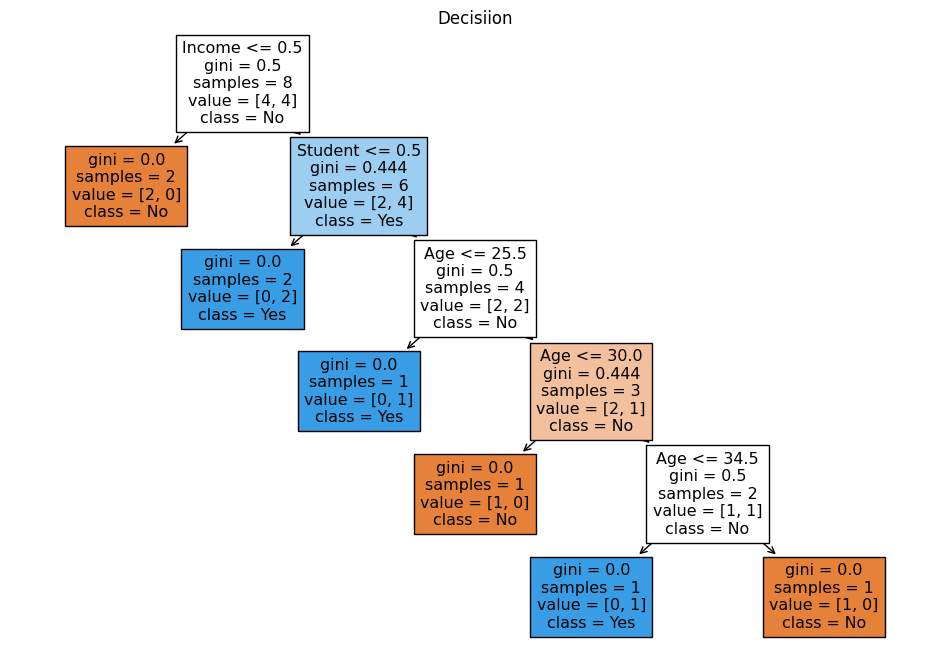

In [15]:
plt.figure(figsize=(12,8))
plot_tree(model ,  feature_names=['Age', 'Income', 'Student'], class_names=['No', 'Yes'], filled=True)
plt.title("Decisiion")
plt.show()